In [1]:
from google.colab import files
uploaded = files.upload()
!unzip -q US-Cars-Dataset.zip

import pandas as pd
df = pd.read_csv("USA_cars_datasets.csv")
df.head()

Saving US-Cars-Dataset.zip to US-Cars-Dataset.zip


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [2]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


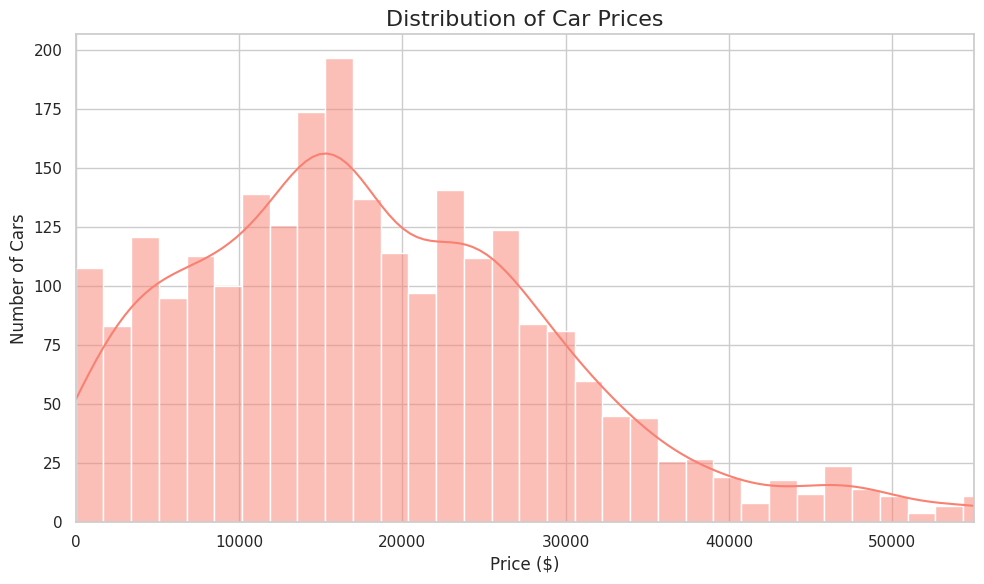

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=50, kde=True, color='salmon')

# Customize the plot
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.xlim(0, df['price'].quantile(0.99))  # Focus on the 99% range to remove extreme outliers

plt.tight_layout()
plt.show()

<ipython-input-11-0a791199ed53>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_df, x='brand', y='price', palette='Set2')


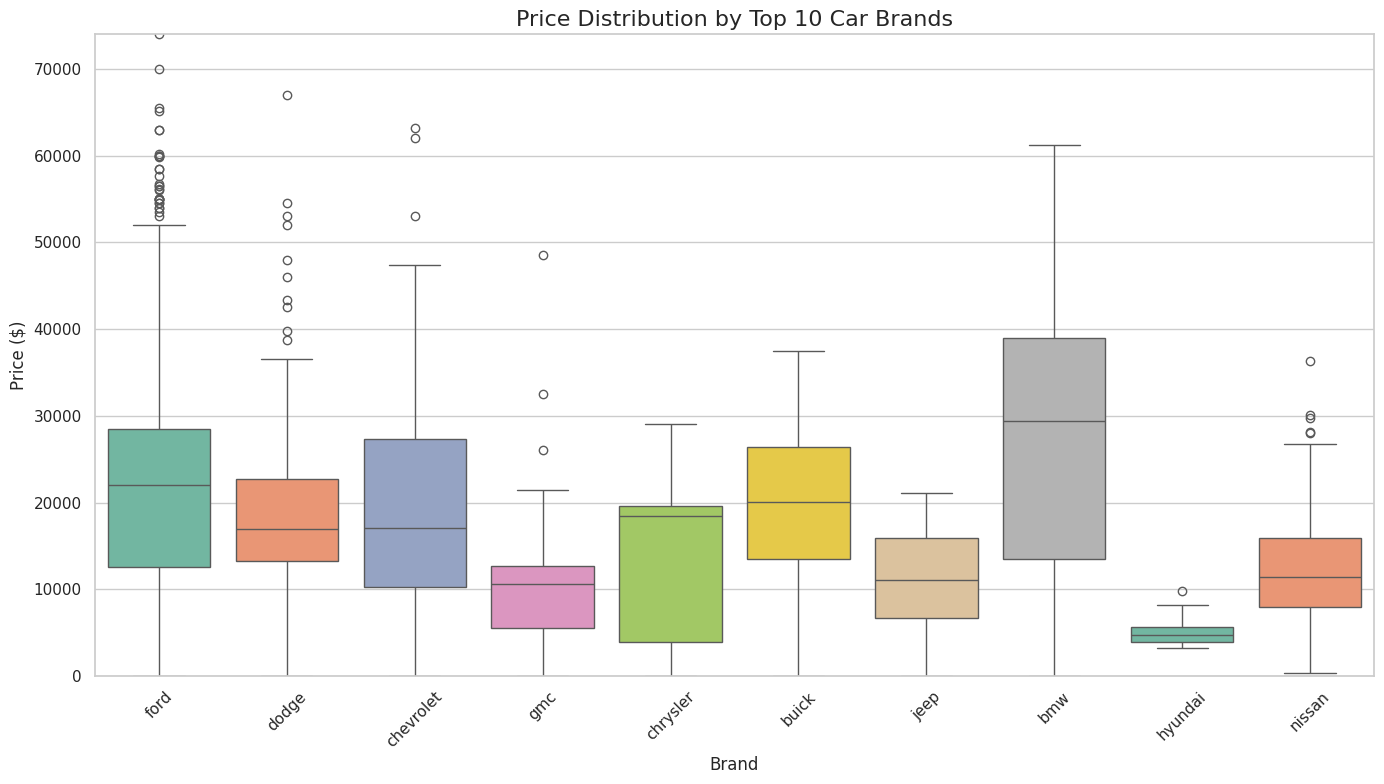

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the top 10 most frequent car brands
top_brands = df['brand'].value_counts().nlargest(10).index

# Filter the DataFrame to include only those top brands
top_df = df[df['brand'].isin(top_brands)]

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=top_df, x='brand', y='price', palette='Set2')

# Customize the plot
plt.title('Price Distribution by Top 10 Car Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylim(0, top_df['price'].max())  # Ensure full range of prices is visible, including outliers

plt.tight_layout()
plt.show()


In [13]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(
    df,
    x='mileage',
    y='price',
    color='condition',
    hover_data=['brand', 'model', 'year', 'state'],
    title='Price vs. Mileage by Condition',
    labels={'mileage': 'Mileage (miles)', 'price': 'Price ($)'},
    width=1200,
    height=600
)

fig.show()


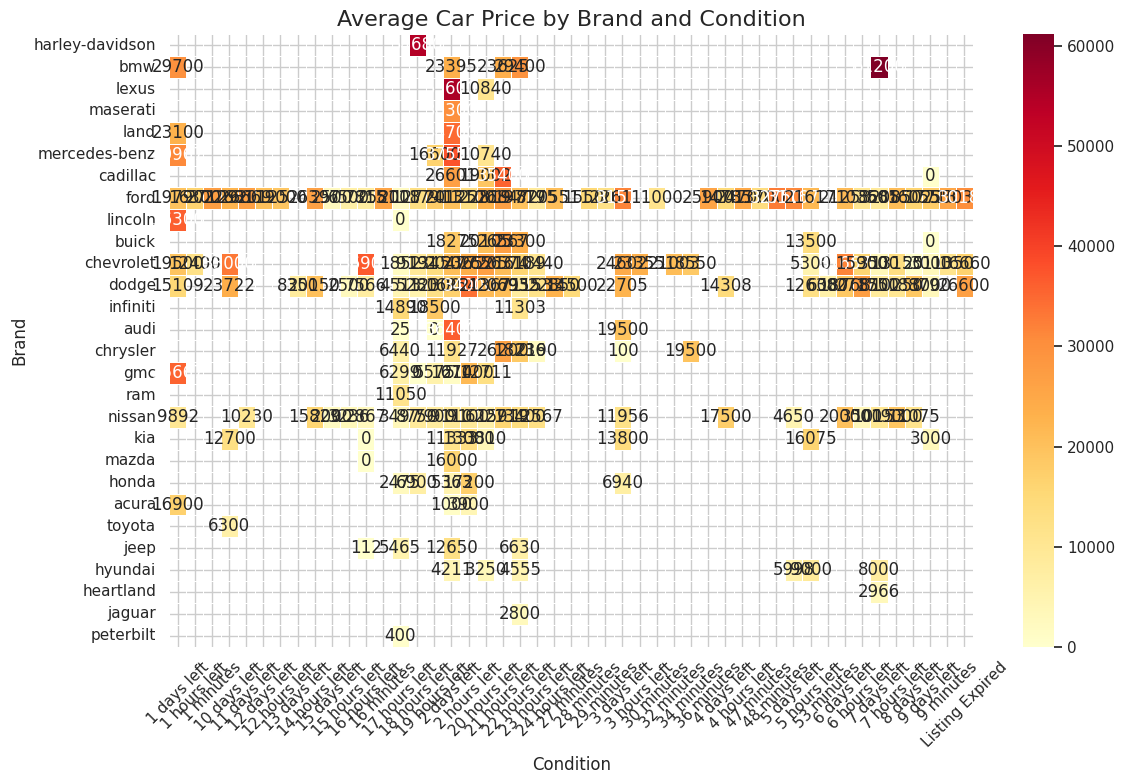

In [16]:
# Create pivot table: average price per brand and condition
heatmap_data = df.pivot_table(
    values='price',
    index='brand',
    columns='condition',
    aggfunc='mean'
)

# Sort by overall average price across conditions
heatmap_data = heatmap_data.loc[heatmap_data.mean(axis=1).sort_values(ascending=False).index]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.5)

# Customize
plt.title('Average Car Price by Brand and Condition', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

